In [1]:
import numpy as np
from numpy import mean, argmax
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, recall_score, precision_recall_curve, f1_score, auc, precision_score, roc_curve
import time
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN

import psutil
import tracemalloc

from matplotlib import pyplot
from matplotlib.pyplot import figure

import platform
import cpuinfo

In [2]:
china_mean_noOutliers = pd.read_csv('C:/Users/boont/Desktop/szakdoga/sorted_with_mean_std.csv')
china_mean_noOutliers = china_mean_noOutliers.drop(['Unnamed: 0'], axis = 1)
china_mean_noOutliers
china_mean_noOutliers = china_mean_noOutliers.apply(lambda x: x.fillna(x.mean()),axis=0)
china_mean_noOutliers

,FLAG,MEAN,STD,2014-01-01 00:00:00,2014-01-02 00:00:00,2014-01-03 00:00:00,2014-01-04 00:00:00,2014-01-05 00:00:00,2014-01-06 00:00:00,2014-01-07 00:00:00,...,2016-10-22 00:00:00,2016-10-23 00:00:00,2016-10-24 00:00:00,2016-10-25 00:00:00,2016-10-26 00:00:00,2016-10-27 00:00:00,2016-10-28 00:00:00,2016-10-29 00:00:00,2016-10-30 00:00:00,2016-10-31 00:00:00
0,1,13.898342,8.843958,5.327215,5.161014,4.851788,5.053549,5.361211,5.019869,4.893738,...,7.18,8.07,8.09,9.53,5.48,8.75,9.30,7.54,9.16,6.74
1,1,0.000000,0.000000,5.327215,5.161014,4.851788,5.053549,5.361211,5.019869,4.893738,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,1,9.921390,6.822524,5.327215,5.161014,4.851788,5.053549,5.361211,5.019869,4.893738,...,10.95,17.95,17.83,17.31,21.44,19.09,18.56,16.25,14.20,13.66
3,1,14.612055,11.422513,5.327215,5.161014,4.851788,5.053549,5.361211,5.019869,4.893738,...,12.81,15.12,17.26,14.91,19.59,20.79,17.95,19.26,14.46,11.72
4,1,8.249738,5.942354,2.900000,5.640000,6.990000,3.320000,3.610000,5.350000,4.730000,...,14.21,10.22,8.47,6.11,6.10,6.73,7.52,10.89,9.86,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39514,0,4.147203,1.583176,5.327215,5.161014,4.851788,5.053549,5.361211,5.019869,4.893738,...,3.27,3.10,2.75,3.01,2.99,2.83,2.54,3.40,3.59,2.54
39515,0,4.892765,1.581757,2.700000,0.000000,0.000000,5.720000,6.050000,5.810000,3.070000,...,3.84,6.62,3.12,5.16,3.62,4.64,3.71,6.22,6.05,4.77
39516,0,1.340594,1.880989,0.580000,1.160000,0.920000,0.980000,1.540000,1.380000,0.890000,...,0.99,0.61,0.65,0.55,0.49,0.51,0.79,0.66,0.39,0.65
39517,0,17.333685,6.776731,16.890000,15.150000,19.280000,17.190000,16.800000,17.480000,17.860000,...,15.64,16.48,13.04,10.39,12.00,11.15,12.22,13.16,13.33,10.39


In [3]:
X_full_mean_noOutliers = china_mean_noOutliers.drop(['FLAG'], axis = 1)
Y_full_mean_noOutliers = china_mean_noOutliers['FLAG']
X_data_full_mean_noOutliers = X_full_mean_noOutliers.values
Y_data_full_mean_noOutliers = Y_full_mean_noOutliers.values

In [4]:
X_train_full_mean_noOutliers, X_test_full_mean_noOutliers, Y_train_full_mean_noOutliers, Y_test_full_mean_noOutliers = train_test_split(X_full_mean_noOutliers, Y_full_mean_noOutliers, test_size = 0.2, random_state = 42)

# default

In [5]:
lrc_default = LogisticRegression(solver='lbfgs')

In [6]:
start = time.time()
lrc_default.fit(X_train_full_mean_noOutliers,Y_train_full_mean_noOutliers)
stop = time.time()
print(f"Training time: {stop - start}sec")
# predictions
lrc_default_y_pred_full = lrc_default.predict(X_test_full_mean_noOutliers)
print(f"Accuracy: {accuracy_score(Y_test_full_mean_noOutliers, lrc_default_y_pred_full)}")
print(f"Recall: {recall_score(Y_test_full_mean_noOutliers, lrc_default_y_pred_full, average='macro')}")
print(confusion_matrix(Y_test_full_mean_noOutliers, lrc_default_y_pred_full))
print(classification_report(Y_test_full_mean_noOutliers, lrc_default_y_pred_full))
print(f"AUC: {roc_auc_score(Y_test_full_mean_noOutliers, lrc_default.predict_proba(X_test_full_mean_noOutliers)[:,1])}")

C:\Users\boont\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Training time: 6.559257507324219sec
Accuracy: 0.9195344129554656
Recall: 0.6081431649298685
[[7104   78]
 [ 558  164]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7182
           1       0.68      0.23      0.34       722

    accuracy                           0.92      7904
   macro avg       0.80      0.61      0.65      7904
weighted avg       0.90      0.92      0.90      7904

AUC: 0.7638850319087964


In [7]:
lrc_probs_default = lrc_default.predict_proba(X_test_full_mean_noOutliers)
lrc_probs_default = lrc_probs_default[:,1]
lrc_precision_default, lrc_recall_default, lrc_threshold_default = precision_recall_curve(Y_test_full_mean_noOutliers, lrc_probs_default)
lrc_f1_default, lrc_auc_default = f1_score(Y_test_full_mean_noOutliers, lrc_default_y_pred_full), auc(lrc_recall_default, lrc_precision_default)

# default smote

In [8]:
tracemalloc.start()
start = time.time()
counter = Counter(Y_train_full_mean_noOutliers)
print('Before', counter)
smt = SMOTE()

X_train_oversampled_sm_full, Y_train_sm_full = smt.fit_resample(X_train_full_mean_noOutliers, Y_train_full_mean_noOutliers)
X_train_sm_full = pd.DataFrame(X_train_oversampled_sm_full, columns=X_train_full_mean_noOutliers.columns)

counter = Counter(Y_train_sm_full)
print('After', counter)
stop = time.time()
print(f"Training time: {stop - start}sec")

current, peak = tracemalloc.get_traced_memory()
print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()

Before Counter({0: 28883, 1: 2732})
After Counter({0: 28883, 1: 28883})
Training time: 17.11623477935791sec
Current memory usage is 504.217741MB; Peak was 983.10695MB


In [9]:
tracemalloc.start()

start = time.time()
lrc_default.fit(X_train_sm_full,Y_train_sm_full)
stop = time.time()
print(f"Training time: {stop - start}sec")

current, peak = tracemalloc.get_traced_memory()
print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()

Training time: 9.070825815200806sec
Current memory usage is 0.165663MB; Peak was 3.295402MB


C:\Users\boont\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [10]:
# predictions
lrc_default_y_pred_sm_full = lrc_default.predict(X_test_full_mean_noOutliers)
print(f"Accuracy: {accuracy_score(Y_test_full_mean_noOutliers, lrc_default_y_pred_sm_full)}")
print(f"Recall: {recall_score(Y_test_full_mean_noOutliers, lrc_default_y_pred_sm_full, average='macro')}")
print(confusion_matrix(Y_test_full_mean_noOutliers, lrc_default_y_pred_sm_full))
print(classification_report(Y_test_full_mean_noOutliers, lrc_default_y_pred_sm_full))
print(f"AUC: {roc_auc_score(Y_test_full_mean_noOutliers, lrc_default.predict_proba(X_test_full_mean_noOutliers)[:,1])}")

Accuracy: 0.771255060728745
Recall: 0.6791613536765891
[[5687 1495]
 [ 313  409]]
              precision    recall  f1-score   support

           0       0.95      0.79      0.86      7182
           1       0.21      0.57      0.31       722

    accuracy                           0.77      7904
   macro avg       0.58      0.68      0.59      7904
weighted avg       0.88      0.77      0.81      7904

AUC: 0.7416684408775093


In [11]:
lrc_probs_default_smt = lrc_default.predict_proba(X_test_full_mean_noOutliers)
lrc_probs_default_smt = lrc_probs_default_smt[:,1]
lrc_precision_default_smt, lrc_recall_default_smt, lrc_threshold_default_smt = precision_recall_curve(Y_test_full_mean_noOutliers, lrc_probs_default_smt)
lrc_f1_default_smt, lrc_auc_default_smt = f1_score(Y_test_full_mean_noOutliers, lrc_default_y_pred_sm_full), auc(lrc_recall_default_smt, lrc_precision_default_smt)

# tuned

In [12]:
lrc_tuned = LogisticRegression(solver='lbfgs', class_weight = 'balanced', max_iter = 50)

In [13]:
start = time.time()
lrc_tuned.fit(X_train_full_mean_noOutliers,Y_train_full_mean_noOutliers)
stop = time.time()
print(f"Training time: {stop - start}sec")
# predictions
lrc_tuned_y_pred_full = lrc_tuned.predict(X_test_full_mean_noOutliers)
print(f"Accuracy: {accuracy_score(Y_test_full_mean_noOutliers, lrc_tuned_y_pred_full)}")
print(f"Recall: {recall_score(Y_test_full_mean_noOutliers, lrc_tuned_y_pred_full, average='macro')}")
print(confusion_matrix(Y_test_full_mean_noOutliers, lrc_tuned_y_pred_full))
print(classification_report(Y_test_full_mean_noOutliers, lrc_tuned_y_pred_full))
print(f"AUC: {roc_auc_score(Y_test_full_mean_noOutliers, lrc_tuned.predict_proba(X_test_full_mean_noOutliers)[:,1])}")

Training time: 2.80639910697937sec
Accuracy: 0.7890941295546559
Recall: 0.6889775608612174
[[5828 1354]
 [ 313  409]]
              precision    recall  f1-score   support

           0       0.95      0.81      0.87      7182
           1       0.23      0.57      0.33       722

    accuracy                           0.79      7904
   macro avg       0.59      0.69      0.60      7904
weighted avg       0.88      0.79      0.83      7904

AUC: 0.7545632895720372


C:\Users\boont\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [14]:
lrc_probs_tuned = lrc_tuned.predict_proba(X_test_full_mean_noOutliers)
lrc_probs_tuned = lrc_probs_tuned[:,1]
lrc_precision_tuned, lrc_recall_tuned, lrc_threshold_tuned = precision_recall_curve(Y_test_full_mean_noOutliers, lrc_probs_tuned)
lrc_f1_tuned, lrc_auc_tuned = f1_score(Y_test_full_mean_noOutliers, lrc_tuned_y_pred_full), auc(lrc_recall_tuned, lrc_precision_tuned)

# tuned smote

In [15]:
tracemalloc.start()

start = time.time()
lrc_tuned.fit(X_train_sm_full,Y_train_sm_full)
stop = time.time()
print(f"Training time: {stop - start}sec")

current, peak = tracemalloc.get_traced_memory()
print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()

Training time: 4.859227180480957sec
Current memory usage is 0.165118MB; Peak was 3.203536MB


C:\Users\boont\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [16]:
# predictions
lrc_tuned_y_pred_sm_full = lrc_tuned.predict(X_test_full_mean_noOutliers)
print(f"Accuracy: {accuracy_score(Y_test_full_mean_noOutliers, lrc_tuned_y_pred_sm_full)}")
print(f"Recall: {recall_score(Y_test_full_mean_noOutliers, lrc_tuned_y_pred_sm_full, average='macro')}")
print(confusion_matrix(Y_test_full_mean_noOutliers, lrc_tuned_y_pred_sm_full))
print(classification_report(Y_test_full_mean_noOutliers, lrc_tuned_y_pred_sm_full))
print(f"AUC: {roc_auc_score(Y_test_full_mean_noOutliers, lrc_tuned.predict_proba(X_test_full_mean_noOutliers)[:,1])}")

Accuracy: 0.770242914979757
Recall: 0.6817189171759809
[[5674 1508]
 [ 308  414]]
              precision    recall  f1-score   support

           0       0.95      0.79      0.86      7182
           1       0.22      0.57      0.31       722

    accuracy                           0.77      7904
   macro avg       0.58      0.68      0.59      7904
weighted avg       0.88      0.77      0.81      7904

AUC: 0.7363861137917123


In [17]:
lrc_probs_tuned_smt = lrc_tuned.predict_proba(X_test_full_mean_noOutliers)
lrc_probs_tuned_smt = lrc_probs_tuned_smt[:,1]
lrc_precision_tuned_smt, lrc_recall_tuned_smt, lrc_threshold_tuned_smt = precision_recall_curve(Y_test_full_mean_noOutliers, lrc_probs_tuned_smt)
lrc_f1_tuned_smt, lrc_auc_tuned_smt = f1_score(Y_test_full_mean_noOutliers, lrc_tuned_y_pred_sm_full), auc(lrc_recall_tuned_smt, lrc_precision_tuned_smt)

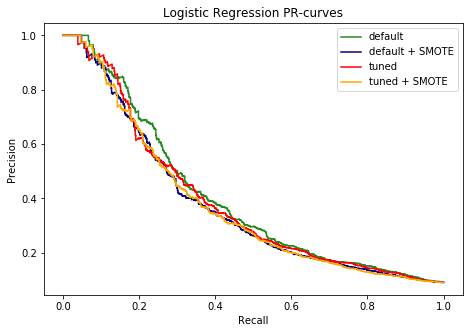

In [18]:
fig, ax = plt.subplots(figsize=(7.5,5))
ax.set_title('Logistic Regression PR-curves')
ax.plot(lrc_recall_default, lrc_precision_default, color='forestgreen', label='default')
ax.plot(lrc_recall_default_smt, lrc_precision_default_smt, color='navy', label='default + SMOTE')
ax.plot(lrc_recall_tuned, lrc_precision_tuned, color='red', label='tuned')
ax.plot(lrc_recall_tuned_smt, lrc_precision_tuned_smt, color='orange', label='tuned + SMOTE')
ax.set(xlabel='Recall', ylabel='Precision')
ax.legend()